## Classifying newswires

In [1]:
from keras.datasets import reuters

(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
import numpy as np

def vectorize_sequences(sequence,dimension=10000):
    results=np.zeros((len(sequence),dimension))
    for i,sequence in enumerate(sequence):
        results[i,sequence]=1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
# def to_one_hot(labels, dimension=46):
#     results = np.zeros((len(labels), dimension))
#     for i, label in enumerate(labels):
#         results[i, label] = 1.
#     return results

# one_hot_train_labels = to_one_hot(train_labels)
# one_hot_test_labels = to_one_hot(test_labels)

from keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [6]:
# Model definition
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Input(shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [7]:
# Compiling the model
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [9]:
history = model.fit(partial_x_train,partial_y_train,
                    epochs=20,batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.4174 - loss: 3.1927 - val_accuracy: 0.6140 - val_loss: 1.8522
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6620 - loss: 1.6418 - val_accuracy: 0.7130 - val_loss: 1.3674
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7425 - loss: 1.1982 - val_accuracy: 0.7380 - val_loss: 1.1756
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7920 - loss: 0.9539 - val_accuracy: 0.7620 - val_loss: 1.0723
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8363 - loss: 0.7720 - val_accuracy: 0.7870 - val_loss: 0.9969
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8566 - loss: 0.6588 - val_accuracy: 0.7960 - val_loss: 0.9531
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8809 - loss: 0.5496 - val_accuracy: 0.8080 - val_loss: 0.8970
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9006 - loss: 0.4557 - val_accuracy: 0.8040 - v

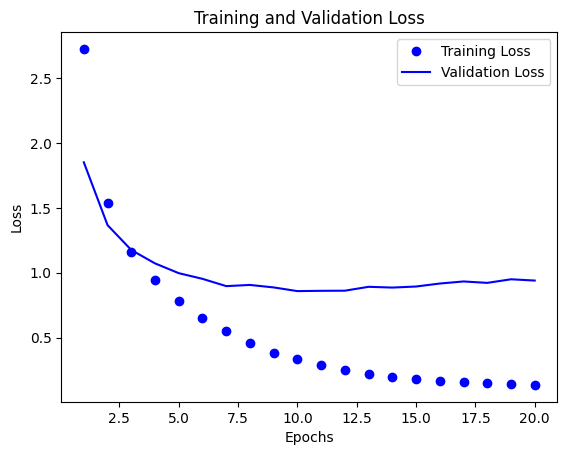

In [10]:
# Plotting the training and validation loss
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')  
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')  
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

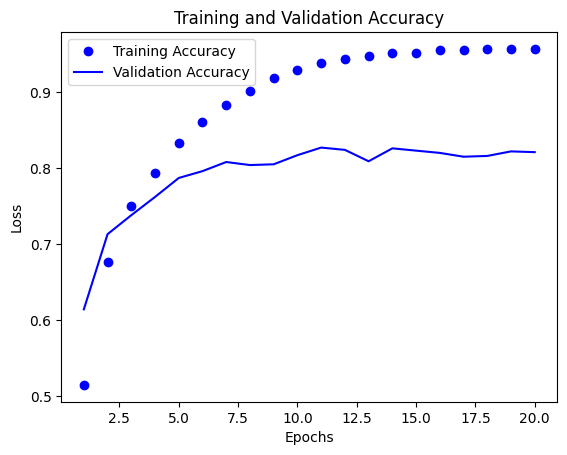

In [11]:
# Plotting the training and validation accuracy
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')  
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')  
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7973 - loss: 1.0222


In [13]:
#randomly classifying
import copy
test_labels_copy=copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hit_array=np.array(test_labels)==np.array(test_labels_copy)
float(np.sum(hit_array))/len(test_labels)

0.1794300979519145